In [5]:
import h5py
import os.path
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gd
from utils.paths import SetupPaths
import matplotlib.patches as  mpatches
from matplotlib.ticker import FormatStrFormatter
from utils.get_summary_data import compile_summary
from utils.vectorCorrection import vectorCorrection as vector


paths = SetupPaths()

In [6]:
plt.show();
plt.rcParams.update({'font.size':20,"xtick.direction":"in","ytick.direction":"in", 
                     "xtick.top":True, "ytick.right":True,"text.usetex":False,
                     "xtick.labelsize":18,"ytick.labelsize":18})


In [7]:
# defining equivalent redshifts
zs = {"z":np.array([0,1,2,3,4]), 
#       "zill":np.array([135,85,68,60,56]), 
      "ztng":np.array([99,50,33,25,21])}

# defining color palette for plotting
palette = {"Illustris dark": "#009292", "Illustris hydro": "#B6DAFF",
           "TNG dark": "#930200", "TNG hydro": "#FFB5DC",
           "dwarf":"olive","massive":"salmon", "difference":"#2C1D11", "difference2":"#464646"}

alphas = {"maj": 0.7, "min": 0.3}


# Counts - primaries and pairs

In [8]:
def plot_counts(reals, save=False):
    
    f = h5py.File(f"{paths.path_plotdata}counts.hdf5",'r')
    counts = f[f"{reals} Realizations"]

    dict_d = {}
    for key,val in counts['dwarf'].items():
        dict_d[key] = np.array(val)

    dict_m = {}
    for key,val in counts['massive'].items():
        dict_m[key] = np.array(val)

    f.close()

    print(f"for {reals} realizations")
    
    ## plot of median counts and differences for illustris and tng
    fig, ax = plt.subplots(2, 2, figsize=(16,8), sharey=False, sharex=True, gridspec_kw={'width_ratios': [1,1], 'height_ratios':[1,0.3],'wspace': 0.10,"hspace":0.02})

    axd = ax[0][0]
    axm = ax[0][1]
    axddiff = ax[1][0]
    axmdiff = ax[1][1]
    axd.set(title="Dwarf", ylabel=r"N$_{\rm count}$ (thousands)")
    axm.set(title="Massive")
    axddiff.set(ylabel=r"N$_{\rm pair}$/N$_{\rm prim}$")

    ##############
    # dwarf plot #
    ##############
    axd.plot(dict_d['z'],dict_d['Median Total Primaries']/1000, color=palette["dwarf"], lw=3,label="Primaries")
    axd.plot(dict_d['z'],dict_d['Median All Pairs']/1000, color=palette["dwarf"], lw=3, linestyle="dashed",label="Pairs")

    axd.fill_between(dict_d['z'], np.array(dict_d['Quarts Total Primaries'])[:,0]/1000, np.array(dict_d['Quarts Total Primaries'])[:,1]/1000,color=palette["dwarf"],alpha=alphas["maj"])
    axd.fill_between(dict_d['z'], np.array(dict_d['Quarts All Pairs'])[:,0]/1000, np.array(dict_d['Quarts All Pairs'])[:,1]/1000,color=palette["dwarf"],alpha=alphas["min"])

    ################
    # massive plot #
    ################
    axm.plot(dict_m['z'],dict_m['Median Total Primaries']/1000, color=palette["massive"], lw=3, label="Primaries")
    axm.plot(dict_m['z'],dict_m['Median All Pairs']/1000, color=palette["massive"], lw=3, linestyle="dashed", label="Pairs")

    axm.fill_between(dict_m['z'], np.array(dict_m['Quarts Total Primaries'])[:,0]/1000, np.array(dict_m['Quarts Total Primaries'])[:,1]/1000,color=palette["massive"],alpha=alphas["maj"])
    axm.fill_between(dict_m['z'], np.array(dict_m['Quarts All Pairs'])[:,0]/1000, np.array(dict_m['Quarts All Pairs'])[:,1]/1000,color=palette["massive"],alpha=alphas["min"])

    ##############
    # dwarf diff #
    ##############
    axddiff.plot(dict_d['z'],dict_d['Median Total Fraction'], color=palette["dwarf"], lw=3,label="Primaries")
    axddiff.fill_between(dict_d['z'], np.array(dict_d['Quarts Total Fraction'])[:,0], np.array(dict_d['Quarts Total Fraction'])[:,1],color=palette["dwarf"],alpha=alphas["maj"])

    ################
    # massive diff #
    ################
    axmdiff.plot(dict_m['z'],dict_m['Median Total Fraction'], color=palette["massive"], lw=3)
    axmdiff.fill_between(dict_m['z'], np.array(dict_m['Quarts Total Fraction'])[:,0], np.array(dict_m['Quarts Total Fraction'])[:,1],color=palette["massive"],alpha=alphas["maj"])

    ################
    # Plot styling #
    ################
    for axx in ax[0]:
        leg = axx.legend(loc="upper right", fontsize=16)

    axm.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

    fig.supxlabel("Redshift",y=0.04)
    if save:
        plt.savefig(f"{paths.path_plots}counts_{reals}.png",bbox_inches='tight',facecolor="white")
    plt.show()



for 1000 realizations


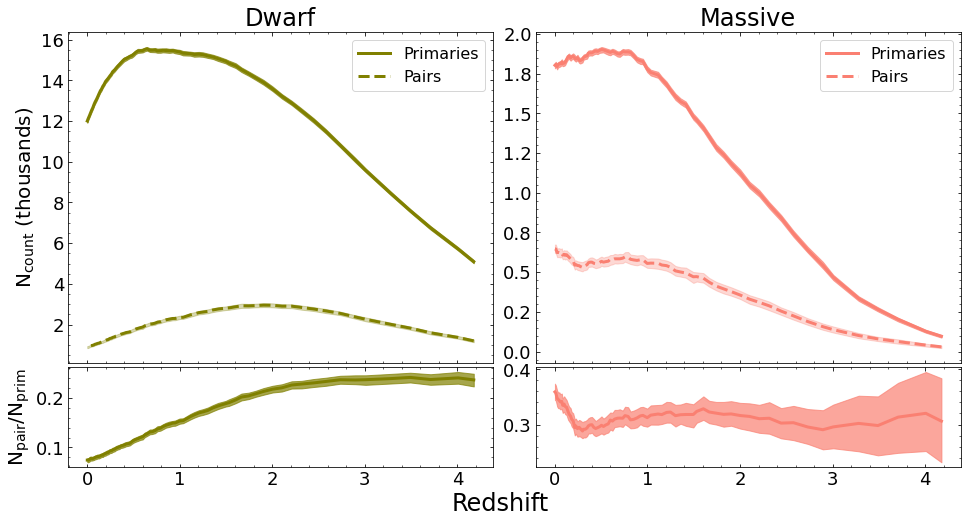

In [10]:
plot_counts(1000, save=True)

# SMR (stellar mass ratio) distribuition

In [29]:
def plot_smr(reals, save=False):
    
    f = h5py.File(f"{paths.path_plotdata}smr.hdf5",'r')
    smrdata = f[f"{reals} Realizations"]

    print(f"for {reals} realizations")
    
    fig, ax = plt.subplots(2,5,figsize=(16,8),sharey="row",sharex=True)
    # plt.subplots_adjust(wspace=0.01,hspace=0.01)
    plt.subplots_adjust(wspace=0,hspace=0)

    for i in range(5):
        dwarf = {}
        massive = {}
        
        for key,val in smrdata[f'z={i}']["dwarf"].items():
            dwarf[key] = np.array(val)
        for key,val in smrdata[f'z={i}']["massive"].items():
            massive[key] = np.array(val)
    
        bins_d = np.arange(0,1.05,0.05)
        bins_h = np.arange(0,1.05,0.05)

        ax[0][i].set_title(f"z = {i}")

        ax[0][i].hist(dwarf['major'],bins=bins_d, weights=np.ones(len(dwarf['major']))/ (len(dwarf['major']) + len(dwarf['minor'])), histtype="step", color=palette['dwarf'], lw=4, label='Major')
        ax[0][i].hist(dwarf['minor'],bins=bins_d, weights=np.ones(len(dwarf['minor']))/ (len(dwarf['major']) + len(dwarf['minor'])), histtype="step", color=palette['dwarf'], lw=3, linestyle='dotted', alpha=0.7, label='Minor')

        ax[1][i].hist(massive['major'],bins=bins_d, weights=np.ones(len(massive['major']))/(len(massive['major']) + len(massive['minor'])), histtype="step", color=palette['massive'], lw=4, label='Major')
        ax[1][i].hist(massive['minor'],bins=bins_d, weights=np.ones(len(massive['minor']))/(len(massive['major']) + len(massive['minor'])), histtype="step", color=palette['massive'], lw=3, linestyle='dotted', alpha=0.7, label='Minor')

    f.close()
    for xx in [ax[0][-1],ax[1][-1]]:
        leg = xx.legend(loc='upper right',fontsize=16)

    for i in range(5):
        ax[1][i].tick_params(axis='x', which='major', labelsize=18)
    for i in range(2):
        ax[i][0].tick_params(axis='y', which='major', labelsize=18)

    fig.supxlabel(r"Stellar mass ratio ($\rm M_{*2}/M_{*1}$)",y=0.03)
    ax[0][0].set_ylabel("Dwarf")
    ax[1][0].set_ylabel("Massive")    
    fig.supylabel(r"P($\rm M_{*2}/M_{*1}$)",x=0.040)
    
    for i in ax:
        for j in i:
            j.set_xticks((0,0.5,1), labels=("0","0.5","1"))
    
    if save:
        plt.savefig(f"../plots/paper1/smrdist_{reals}.png",bbox_inches='tight',facecolor="white")
    plt.show()



for 1000 realizations


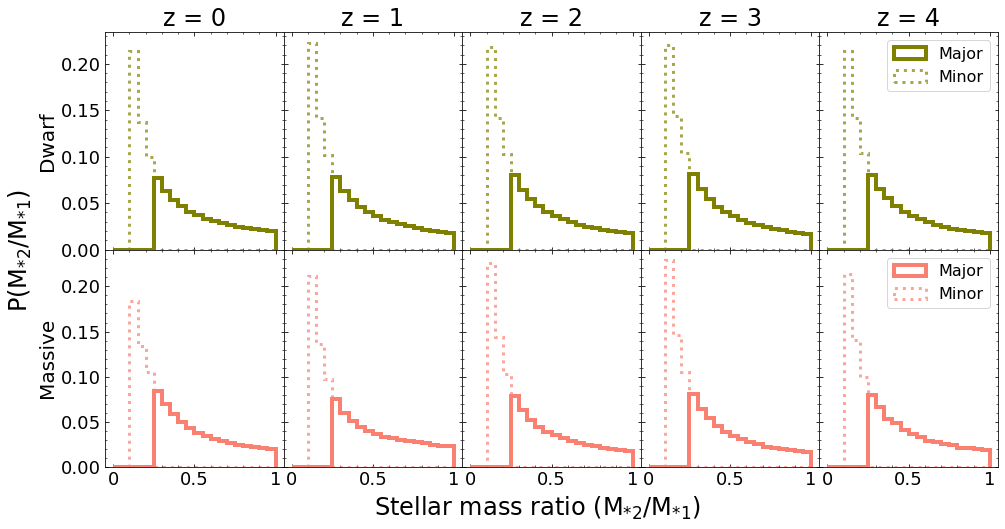

In [30]:
# plot_smr(10,False)
# plot_smr(100,False)
plot_smr(1000,True)

# Pair fraction

In [44]:
def plot_pairfrac(reals, save=False):
    
    f = h5py.File(f"{paths.path_plotdata}pairfrac.hdf5",'r')

    ratios = {}
    for key,val in f[f"{reals} Realizations"].items():
        ratios[key] = np.array(val)

    f.close()

    print(f"for {reals} realizations")
    
    ## plot of median counts and differences for illustris and tng
    fig, ax = plt.subplots(2, 2, figsize=(16,8), sharey="row", sharex=True, gridspec_kw={'width_ratios': [1,1], 'height_ratios':[1,0.3],'wspace': 0.02,"hspace":0.05})

    ax_d = ax[0][0]
    ax_m = ax[0][1]
    ax_ddiff = ax[1][0]
    ax_mdiff = ax[1][1]
    ax_d.set(title="Major pairs", ylabel="Pair fraction")
    ax_m.set(title="Minor pairs")
    ax_ddiff.set(ylabel="Diff.")

    al = 0.7

    #############
    # dwarf #
    #############
    # ax_d.plot(dwarfs['z'],dwarfs['Median Major Fraction'], color=palette["dwarf"], lw=3)
    # ax_d.fill_between(dwarfs['z'], np.array(dwarfs['Quarts Major Fraction'])[:,0], np.array(dwarfs['Quarts Major Fraction'])[:,1],color=palette["dwarf"],alpha=al, label="Dwarf")

    ax_d.plot(ratios['z'],ratios['Median Major Dwarf'], color=palette["dwarf"], lw=3, label="Dwarf")
    ax_d.fill_between(ratios['z'], np.array(ratios['Quartile Major Dwarf'])[:,0], np.array(ratios['Quartile Major Dwarf'])[:,1],color=palette["dwarf"],alpha=al)


    ax_d.plot(ratios['z'],ratios['Median Major Massive'], color=palette["massive"], lw=3, label="Massive")
    ax_d.fill_between(ratios['z'], np.array(ratios['Quartile Major Massive'])[:,0], np.array(ratios['Quartile Major Massive'])[:,1],color=palette["massive"],alpha=al)

    ###########
    # massive #
    ###########
    ax_m.plot(ratios['z'],ratios['Median Minor Dwarf'], color=palette["dwarf"], lw=3, linestyle="dotted", label="Dwarf")
    ax_m.fill_between(ratios['z'], np.array(ratios['Quartile Minor Dwarf'])[:,0], np.array(ratios['Quartile Minor Dwarf'])[:,1],color=palette["dwarf"],alpha=alphas["min"])


    ax_m.plot(ratios['z'],ratios['Median Minor Massive'], color=palette["massive"], lw=3, linestyle="dotted", label="Massive")
    ax_m.fill_between(ratios['z'], np.array(ratios['Quartile Minor Massive'])[:,0], np.array(ratios['Quartile Minor Massive'])[:,1],color=palette["massive"],alpha=alphas["min"])

    ### 
    ax_ddiff.plot(ratios['z'],ratios['Median Major Difference'], color="#2C1D11", lw=3)
    ax_ddiff.fill_between(ratios['z'], np.array(ratios['Quartile Major Difference'])[:,0], np.array(ratios['Quartile Major Difference'])[:,1],color="#2C1D11",alpha=al)

    ax_mdiff.plot(ratios['z'],ratios['Median Minor Difference'], color="#2C1D11", lw=3,linestyle="dotted")
    ax_mdiff.fill_between(ratios['z'], np.array(ratios['Quartile Minor Difference'])[:,0], np.array(ratios['Quartile Minor Difference'])[:,1],color="#2C1D11",alpha=0.3)

    ax_ddiff.axhline(0,color="black",lw=1,alpha=0.3)
    ax_mdiff.axhline(0,color="black",lw=1,alpha=0.3)
    # ax_m.axvline(ratios['z'][-19])

    #############
    #############
    for ax in [ax_d,ax_m]:
        leg = ax.legend(loc='lower right',fontsize=16)

#         for lh in leg.legendHandles: 
#             lh.set_alpha(1)
#     ax_ddiff.legend(loc="upper right",fontsize=16)        
    # ax_d.set_xlim(0,4)
    fig.supxlabel("Redshift",y=0.045)
    if save:
        plt.savefig(f"{paths.path_plots}pairfrac_{reals}.png",bbox_inches='tight',facecolor="white")
    plt.show()



for 1000 realizations


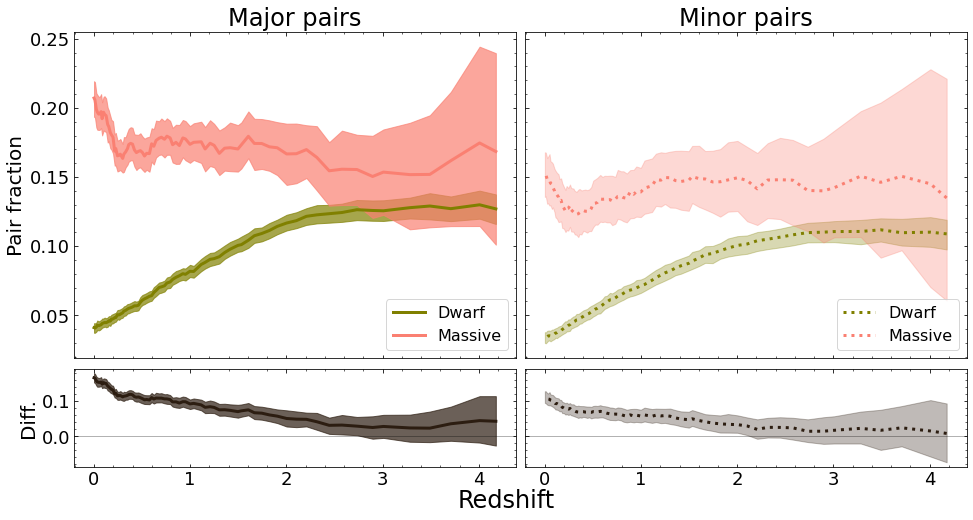

In [45]:
plot_pairfrac(1000,False)

# Sep and Vel evolution

In [54]:
f = h5py.File(f"{paths.path_plotdata}sepvel.hdf5",'r')

In [62]:
f["100 Realizations"]["Separation"].keys()

<KeysViewHDF5 ['Median Major Difference', 'Median Major Dwarf', 'Median Major Massive', 'Median Minor Difference', 'Median Minor Dwarf', 'Median Minor Massive', 'Quartile Major Difference', 'Quartile Major Dwarf', 'Quartile Major Massive', 'Quartile Minor Difference', 'Quartile Minor Dwarf', 'Quartile Minor Massive', 'z']>

In [66]:
sep = {}

In [67]:
for key,val in f[f"100 Realizations"]["Scaled Separation"].items():
    sep[key] = np.array(val)

In [69]:
f.close()

In [68]:
sep['Median Major Massive']

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [52]:
def plot_sepvelevo(reals, save=False):
    
    print(f"for {reals} realizations")
    
    f = h5py.File(f"{paths.path_plotdata}sepvel.hdf5",'r')

    ssep, sep, svel, vel  = {}, {}, {}, {}
    labels = ['Scaled Separation', 'Separation', 'Scaled Velocity', 'Velocity']

    # sep plot first:
    for key,val in f[f"{reals} Realizations"]["Separation"].items():
        sep[key] = np.array(val)
        
    
    fig, ax = plt.subplots(2, 2, figsize=(16,8), sharey=False, sharex=True, gridspec_kw={'width_ratios': [1,1], 'height_ratios':[1,0.3],'wspace': 0.1,"hspace":0.03})

    ax_d = ax[0][0]
    ax_m = ax[0][1]
    ax_ddiff = ax[1][0]
    ax_mdiff = ax[1][1]

    ax_d.set(title="Dwarf pairs", ylabel="Median Separation [kpc]")
    ax_m.set(title="Massive pairs")
    ax_ddiff.set(ylabel="Maj - Min")

    al = 0.7

    #############
    # dwarf #
    #############
    ax_d.plot(sep['z'],sep['Median Major Dwarf'], color=palette["dwarf"], lw=3, label="Major")
    ax_d.plot(sep['z'],sep['Median Minor Dwarf'], color=palette["dwarf"], lw=3, linestyle="dotted", label="Minor")

    ax_d.fill_between(sep['z'], np.array(sep['Quartile Major Dwarf'])[:,0], np.array(sep['Quartile Major Dwarf'])[:,1],color=palette["dwarf"], alpha=alphas["maj"])
    ax_d.fill_between(sep['z'], np.array(sep['Quartile Minor Dwarf'])[:,0], np.array(sep['Quartile Minor Dwarf'])[:,1],color=palette["dwarf"], alpha=alphas["min"])


    #############
    # massive #
    #############
    ax_m.plot(sep['z'],sep['Median Major Massive'], color=palette["massive"], lw=3, label="Major")
    ax_m.plot(sep['z'],sep['Median Minor Massive'], color=palette["massive"], lw=3, linestyle="dotted", label="Minor")

    ax_m.fill_between(sep['z'], np.array(sep['Quartile Major Massive'])[:,0], np.array(sep['Quartile Major Massive'])[:,1],color=palette["massive"],alpha=alphas["maj"])
    ax_m.fill_between(sep['z'], np.array(sep['Quartile Minor Massive'])[:,0], np.array(sep['Quartile Minor Massive'])[:,1],color=palette["massive"],alpha=alphas["min"])


    ####################
    # dwarf difference #
    ####################
    # axmaj_d.plot(tngd_d['z'],tngd_d['Major Median'], color=palette["Illustris dark"], lw=3)
    ax_ddiff.plot(sep['z'],sep['Median Dwarf Difference'], color=palette["dwarf"], lw=3, label="Difference")
    ax_ddiff.fill_between(sep['z'], np.array(sep['Quartile Dwarf Difference'])[:,0], np.array(sep['Quartile Dwarf Difference'])[:,1],color=palette["dwarf"], alpha=alphas["maj"])


    ######################
    # massive difference #
    ######################
    ax_mdiff.plot(sep['z'],sep['Median Massive Difference'], color=palette["massive"], lw=3, label="Difference")
    ax_mdiff.fill_between(sep['z'], np.array(sep['Quartile Massive Difference'])[:,0], np.array(sep['Quartile Massive Difference'])[:,1],color=palette["massive"],alpha=alphas["maj"])

#     ax_ddiff.axhline(0,color="black",lw=1,alpha=0.3)
#     ax_mdiff.axhline(0,color="black",lw=1,alpha=0.3)

    #############
    #############
    for ax in [ax_d,ax_m,ax_mdiff, ax_ddiff]:
        leg = ax.legend(loc='upper right',fontsize=16)

    #     for lh in leg.legendHandles: 
    #         lh.set_alpha(1)

    fig.supxlabel("Redshift",y=0.05)  
    
    if save:
        plt.savefig(f"{paths.path_plots}sep_{reals}.png",bbox_inches='tight',facecolor="white")
    plt.show()


    f.close()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


for 10 realizations


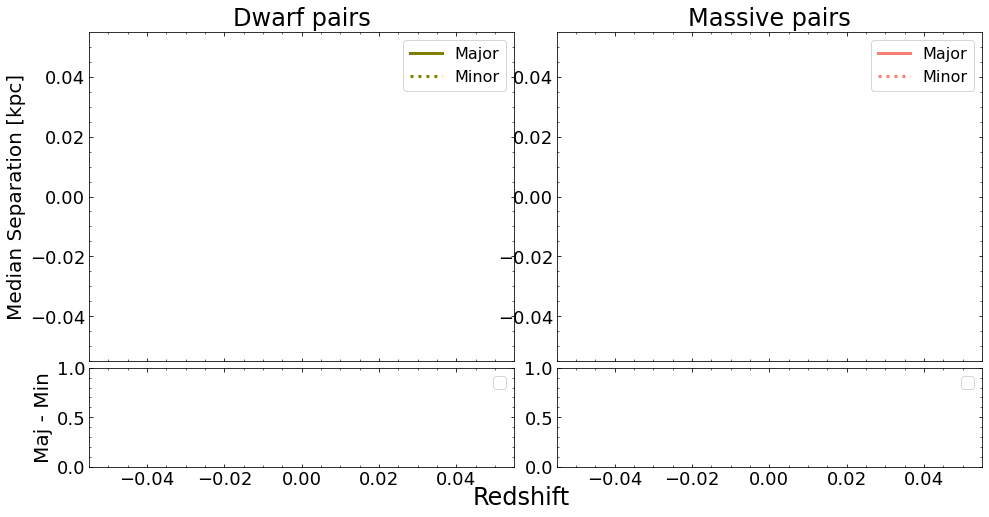

In [53]:
plot_sepvelevo(10,False)

In [ ]:
f = 

In [7]:
# function to make major+minor sep plots
d_seps = get_key("TNG", "hydro", "dwarf", "Separation", None)
d_vels = get_key("TNG", "hydro", "dwarf", "RelVel", None)
print("done with dwarf")

m_seps = get_key("TNG", "hydro", "massive", "Separation", None)
m_vels = get_key("TNG", "hydro", "massive", "RelVel", None)
print("done with massive")


done with dwarf
done with massive


## Separations

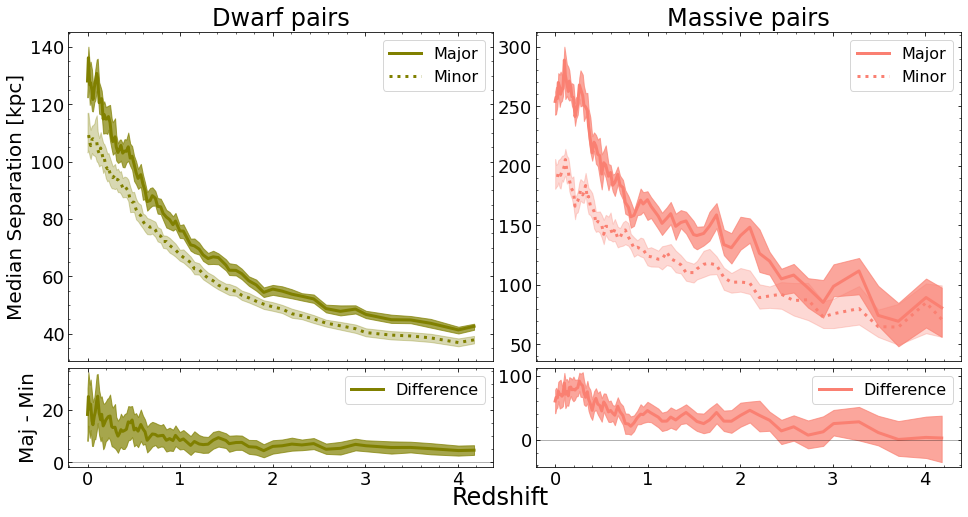

In [18]:
## plot of median counts and differences for illustris and tng
fig, ax = plt.subplots(2, 2, figsize=(16,8), sharey=False, sharex=True, gridspec_kw={'width_ratios': [1,1], 'height_ratios':[1,0.3],'wspace': 0.1,"hspace":0.03})

ax_d = ax[0][0]
ax_m = ax[0][1]
ax_ddiff = ax[1][0]
ax_mdiff = ax[1][1]

ax_d.set(title="Dwarf pairs", ylabel="Median Separation [kpc]")
ax_m.set(title="Massive pairs")
ax_ddiff.set(ylabel="Maj - Min")

al = 0.7

#############
# dwarf #
#############
ax_d.plot(d_seps['z'],d_seps['Major Median'], color=palette["dwarf"], lw=3, label="Major")
ax_d.plot(d_seps['z'],d_seps['Minor Median'], color=palette["dwarf"], lw=3, linestyle="dotted", label="Minor")

ax_d.fill_between(d_seps['z'], np.array(d_seps['Major Quarts'])[:,0], np.array(d_seps['Major Quarts'])[:,1],color=palette["dwarf"], alpha=alphas["maj"])
ax_d.fill_between(d_seps['z'], np.array(d_seps['Minor Quarts'])[:,0], np.array(d_seps['Minor Quarts'])[:,1],color=palette["dwarf"], alpha=alphas["min"])


#############
# massive #
#############
ax_m.plot(m_seps['z'],m_seps['Major Median'], color=palette["massive"], lw=3, label="Major")
ax_m.plot(m_seps['z'],m_seps['Minor Median'], color=palette["massive"], lw=3, linestyle="dotted", label="Minor")

ax_m.fill_between(m_seps['z'], np.array(m_seps['Major Quarts'])[:,0], np.array(m_seps['Major Quarts'])[:,1],color=palette["massive"],alpha=alphas["maj"])
ax_m.fill_between(m_seps['z'], np.array(m_seps['Minor Quarts'])[:,0], np.array(m_seps['Minor Quarts'])[:,1],color=palette["massive"],alpha=alphas["min"])


####################
# dwarf difference #
####################
# axmaj_d.plot(tngd_d['z'],tngd_d['Major Median'], color=palette["Illustris dark"], lw=3)
ax_ddiff.plot(d_seps['z'],d_seps['Difference Median'], color=palette["dwarf"], lw=3, label="Difference")
ax_ddiff.fill_between(d_seps['z'], np.array(d_seps['Difference Quarts'])[:,0], np.array(d_seps['Difference Quarts'])[:,1],color=palette["dwarf"], alpha=alphas["maj"])


######################
# massive difference #
######################
ax_mdiff.plot(m_seps['z'],m_seps['Difference Median'], color=palette["massive"], lw=3, label="Difference")
ax_mdiff.fill_between(m_seps['z'], np.array(m_seps['Difference Quarts'])[:,0], np.array(m_seps['Difference Quarts'])[:,1],color=palette["massive"],alpha=alphas["maj"])

ax_ddiff.axhline(0,color="black",lw=1,alpha=0.3)
ax_mdiff.axhline(0,color="black",lw=1,alpha=0.3)

#############
#############
for ax in [ax_d,ax_m,ax_mdiff, ax_ddiff]:
    leg = ax.legend(loc='upper right',fontsize=16)

#     for lh in leg.legendHandles: 
#         lh.set_alpha(1)
              
fig.supxlabel("Redshift",y=0.05)
plt.savefig(f"../plots/paper1/separation_1000.png",bbox_inches='tight',facecolor="white")
plt.show()


In [32]:
m_seps['z'][29]

0.9972942257819404

In [37]:
max(m_seps['Minor Median'][-20:-1])

205.21323487903436

In [33]:
print('major dwarf: z=4 is ',d_seps['Major Median'][0], "z=0 is",d_seps['Major Median'][-1])
print('minor dwarf: z=4 is ',d_seps['Minor Median'][0], "z=0 is",d_seps['Minor Median'][-1])
print('major massive z=4 is ',m_seps['Major Median'][0], "z=0 is",m_seps['Major Median'][-1])
print('minor massive z=4 is ',m_seps['Minor Median'][0], "z=0 is",m_seps['Minor Median'][-1])

print('major massive z=1 is ',m_seps['Major Median'][29])
print('minor massive z=1 is ',m_seps['Minor Median'][29])

major dwarf: z=4 is  42.50555195342244 z=0 is 128.09492612218634
minor dwarf: z=4 is  37.77784094200939 z=0 is 109.08681827882475
major massive z=4 is  80.84917951519516 z=0 is 253.9963804859468
minor massive z=4 is  71.15711597454981 z=0 is 190.76623878152412
major massive z=1 is  171.49964321690095
minor massive z=1 is  124.0895054671989


## Velocities

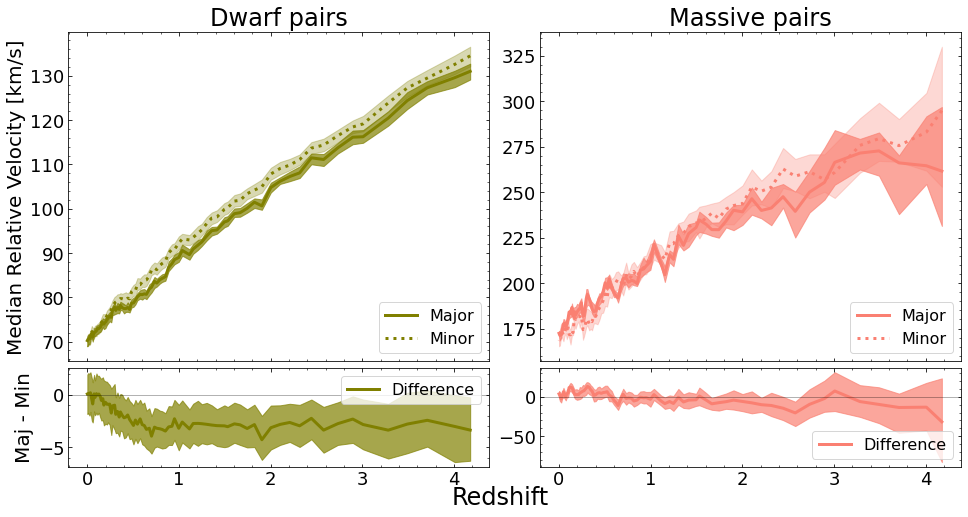

In [17]:
## plot of median counts and differences for illustris and tng
fig, ax = plt.subplots(2, 2, figsize=(16,8), sharey=False, sharex=True, gridspec_kw={'width_ratios': [1,1], 'height_ratios':[1,0.3],'wspace': 0.12,"hspace":0.03})

ax_d = ax[0][0]
ax_m = ax[0][1]
ax_ddiff = ax[1][0]
ax_mdiff = ax[1][1]

ax_d.set(title="Dwarf pairs", ylabel="Median Relative Velocity [km/s]")
ax_m.set(title="Massive pairs")
ax_ddiff.set(ylabel="Maj - Min")

#############
# dwarf #
#############
ax_d.plot(d_vels['z'],d_vels['Major Median'], color=palette["dwarf"], lw=3, label="Major")
ax_d.plot(d_vels['z'],d_vels['Minor Median'], color=palette["dwarf"], lw=3,linestyle="dotted", label="Minor")

ax_d.fill_between(d_vels['z'], np.array(d_vels['Major Quarts'])[:,0], np.array(d_vels['Major Quarts'])[:,1], color=palette["dwarf"], alpha=alphas["maj"])
ax_d.fill_between(d_vels['z'], np.array(d_vels['Minor Quarts'])[:,0], np.array(d_vels['Minor Quarts'])[:,1], color=palette["dwarf"], alpha=alphas["min"])

#############
# massive #
#############
ax_m.plot(m_vels['z'],m_vels['Major Median'], color=palette["massive"], lw=3, label="Major")
ax_m.plot(m_vels['z'],m_vels['Minor Median'], color=palette["massive"], lw=3, linestyle="dotted", label="Minor")

ax_m.fill_between(m_vels['z'], np.array(m_vels['Major Quarts'])[:,0], np.array(m_vels['Major Quarts'])[:,1], color=palette["massive"], alpha=alphas["maj"])
ax_m.fill_between(m_vels['z'], np.array(m_vels['Minor Quarts'])[:,0], np.array(m_vels['Minor Quarts'])[:,1], color=palette["massive"], alpha=alphas["min"])

####################
# dwarf difference #
####################
# axmaj_d.plot(tngd_d['z'],tngd_d['Major Median'], color=palette["Illustris dark"], lw=3)
ax_ddiff.plot(d_vels['z'],d_vels['Difference Median'], color=palette["dwarf"], lw=3, label="Difference")
ax_ddiff.fill_between(d_vels['z'], np.array(d_vels['Difference Quarts'])[:,0], np.array(d_vels['Difference Quarts'])[:,1],color=palette["dwarf"], alpha=alphas["maj"])

######################
# massive difference #
######################
ax_mdiff.plot(m_vels['z'],m_vels['Difference Median'], color=palette["massive"], lw=3, label="Difference")
ax_mdiff.fill_between(m_vels['z'], np.array(m_vels['Difference Quarts'])[:,0], np.array(m_vels['Difference Quarts'])[:,1],color=palette["massive"],alpha=alphas["maj"])

ax_ddiff.axhline(0,color="black",lw=1,alpha=0.3)
ax_mdiff.axhline(0,color="black",lw=1,alpha=0.3)

#############
#############
for axx in [ax_d,ax_m]:
    leg = axx.legend(loc='lower right',fontsize=16)
ax_ddiff.legend(loc='upper right',fontsize=16)
ax_mdiff.legend(loc='lower right',fontsize=16)
    
fig.supxlabel("Redshift",y=0.05)
plt.savefig(f"../plots/paper1/velocity_1000.png",bbox_inches='tight',facecolor="white")
plt.show()


In [22]:
print('major dwarf: z=4 is ',d_vels['Major Median'][0], "z=0 is",d_vels['Major Median'][-1])
print('minor dwarf: z=4 is ',d_vels['Minor Median'][0], "z=0 is",d_vels['Minor Median'][-1])
print('major massive z=4 is ',m_vels['Major Median'][0], "z=0 is",m_vels['Major Median'][-1])
print('minor massive z=4 is ',m_vels['Minor Median'][0], "z=0 is",m_vels['Minor Median'][-1])

major dwarf: z=4 is  131.03819120771948 z=0 is 70.24218435860143
minor dwarf: z=4 is  134.5313617744486 z=0 is 70.0476092193611
major massive z=4 is  261.55672707377937 z=0 is 172.39239496968645
minor massive z=4 is  294.8468169401724 z=0 is 168.27376450727212


# Scaled Sep and Vel Evolution

In [128]:
def get_scaledkey(key, errorprint=False, redshiftcutoff=True):    
    snapshots = np.arange(0,100,1)
    snapshots = np.delete(snapshots, np.where(snapshots==48)[0])
    redcutoff = 4.2
        
    redshifts = []  
    med_majdw, med_mindw, med_majma, med_minma, med_majdiff, med_mindiff = [], [], [], [], [], []
    quart_majdw, quart_mindw, quart_majma, quart_minma, quart_majdiff, quart_mindiff = [], [], [], [], [], []
            
    for snap in snapshots:  
        try:
            pair_path = f"TNG_{snap}_1000.hdf5"
            pair_data = h5py.File(f"{paths.path_pairs}{pair_path}", "r")
            
            if np.size(pair_data) == 0:
                raise EmptyFile
                
            redshift = pair_data['Header'].attrs['Redshift']
            
            if redshiftcutoff & (redshift > redcutoff):
                raise SkipRedshift
                
            if (len(pair_data['pairs']["hydro"]['Group ID']) == 0):    
                raise EmptyFile
                
            pair = pair_data["pairs"]["hydro"]
            priStell = np.array(pair["Sub1 Stellar Mass"])
            secStell = np.array(pair["Sub2 Stellar Mass"])
            pairGroups = np.array(pair["Group Mass"])
            pairGrRads = np.array(pair["Group Radius"])
            pairReals = np.array(pair["Realization"])
            seps = np.array(pair["Separation"]) 
            vels = np.array(pair["RelVel"]) 
            
            majors = (secStell/priStell > 1/4)
            minors = (secStell/priStell > 1/10) & (secStell/priStell < 1/4)
            pair_lowsep = (seps > 10) & (seps < 10000)
            
            if key == "Separation":
                scaleddat = seps / pairGrRads
            elif key == "RelVel":
                G = 4.3009173e4 # in km^2 kpc / (1e10M⊙ s^2)
                vvir = np.sqrt(G*pairGroups / pairGrRads)
                scaleddat = vels / (vvir)     
                
                 ## dwarfs
            pair_pri_dwarf = get_primmask(priStell, "dwarf")
            pair_group_dwarf = get_groupmask(pairGroups, "dwarf")
            
                # defining combined masks 
            pair_mask_dwarf = pair_pri_dwarf & pair_group_dwarf & pair_lowsep
            
            ## massive
            pair_pri_massive = get_primmask(priStell, "massive")
            pair_group_massive = get_groupmask(pairGroups, "massive")

                # defining combined masks 
            pair_mask_massive = pair_pri_massive & pair_group_massive & pair_lowsep
            
            real_majdw = []
            real_mindw = []
            real_majma = []
            real_minma = []
            real_majdiff = []
            real_mindiff = []
            
                
            realizations = np.unique( pairReals )

            for real in realizations:
                pair_real = pairReals == real

                mask_majdw = pair_real & pair_mask_dwarf & majors
                mask_mindw = pair_real & pair_mask_dwarf & minors
                mask_majma = pair_real & pair_mask_massive & majors
                mask_minma = pair_real & pair_mask_massive & minors

                majdw_xx = np.median( scaleddat[mask_majdw] )
                mindw_xx = np.median( scaleddat[mask_mindw] )
                majma_xx = np.median( scaleddat[mask_majma] )
                minma_xx = np.median( scaleddat[mask_minma] )

                real_majdw.append( majdw_xx )
                real_mindw.append( mindw_xx )
                real_majma.append( majma_xx )
                real_minma.append( minma_xx )
                real_majdiff.append( majma_xx - majdw_xx)
                real_mindiff.append( minma_xx - mindw_xx)

            lower, upper = 16,84         
            redshifts.append( redshift )
            
            med_majdw.append( np.median(real_majdw) )
            med_mindw.append( np.median(real_mindw) )
            med_majma.append( np.median(real_majma) )
            med_minma.append( np.median(real_minma) )
            med_majdiff.append( np.median(real_majdiff) )
            med_mindiff.append( np.median(real_mindiff) )

            
            quart_majdw.append( np.percentile( real_majdw, [lower,upper] ) )
            quart_mindw.append( np.percentile( real_mindw, [lower,upper] ) )
            quart_majma.append( np.percentile( real_majma, [lower,upper] ) )
            quart_minma.append( np.percentile( real_minma, [lower,upper] ) )
            quart_majdiff.append( np.percentile( real_majdiff, [lower,upper] ) )
            quart_mindiff.append( np.percentile( real_mindiff, [lower,upper] ) )

        except KeyError:
            if errorprint: print(f'skipping {snap} for KeyError. Please debug')
            continue
            
        except EmptyFile:
            if errorprint: print(f"skipping {snap}, empty file")
            continue
            
        except SkipRedshift:
            if errorprint: print(f"skipping {snap}, redshift out of range")
                
    scaled_dictionary = {"z": np.array(redshifts),

                        "Median Major Dwarf": np.array(med_majdw),
                        "Median Minor Dwarf": np.array(med_mindw),
                        "Median Major Massive": np.array(med_majma),
                        "Median Minor Massive": np.array(med_minma),
                        "Median Major Difference": np.array(med_majdiff),
                        "Median Minor Difference": np.array(med_mindiff),

                        "Quartile Major Dwarf": np.array(quart_majdw),
                        "Quartile Minor Dwarf": np.array(quart_mindw),
                        "Quartile Major Massive": np.array(quart_majma),
                        "Quartile Minor Massive": np.array(quart_minma),
                        "Quartile Major Difference": np.array(quart_majdiff),
                        "Quartile Minor Difference": np.array(quart_mindiff) }
    
    return scaled_dictionary


In [129]:
scaledseps = get_scaledkey("Separation")
print("done with seps")

scaledvels = get_scaledkey("RelVel")
print("done with vels")


done with seps
done with vels


## Scaled separation

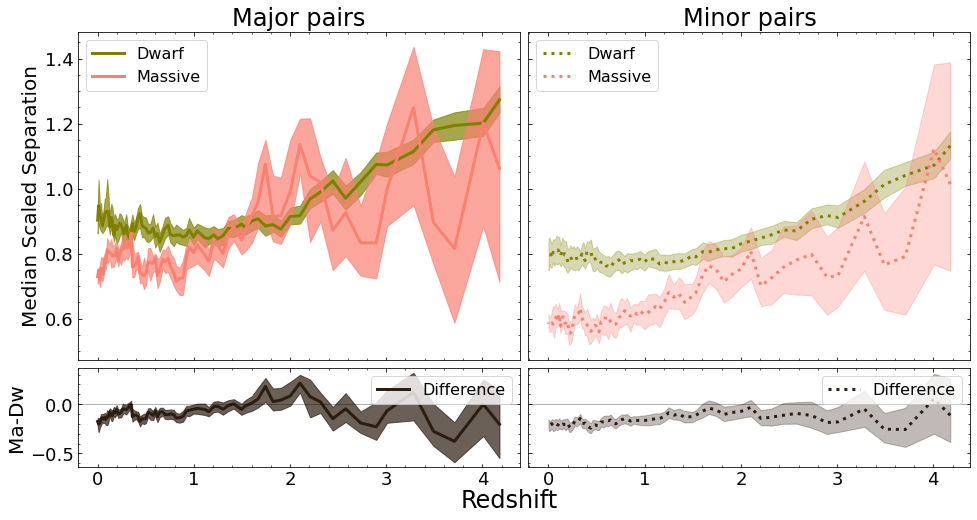

In [130]:
## plot of median counts and differences for illustris and tng
fig, ax = plt.subplots(2, 2, figsize=(16,8), sharey="row", sharex=True, gridspec_kw={'width_ratios': [1,1], 'height_ratios':[1,0.3],'wspace': 0.02,"hspace":0.04})

ax_d = ax[0][0]
ax_m = ax[0][1]
ax_ddiff = ax[1][0]
ax_mdiff = ax[1][1]

ax_d.set(title="Major pairs", ylabel="Median Scaled Separation")
ax_m.set(title="Minor pairs")
ax_ddiff.set(ylabel=r"Ma-Dw")

#############
# dwarf #
#############
ax_d.plot(scaledseps['z'],scaledseps['Median Major Dwarf'], color=palette["dwarf"], lw=3, label="Dwarf")
ax_d.plot(scaledseps['z'],scaledseps['Median Major Massive'], color=palette["massive"], lw=3, label="Massive")

ax_d.fill_between(scaledseps['z'], np.array(scaledseps['Quartile Major Dwarf'])[:,0], np.array(scaledseps['Quartile Major Dwarf'])[:,1],color=palette["dwarf"],alpha=alphas["maj"])
ax_d.fill_between(scaledseps['z'], np.array(scaledseps['Quartile Major Massive'])[:,0], np.array(scaledseps['Quartile Major Massive'])[:,1],color=palette["massive"],alpha=alphas["maj"])

#############
# massive #
#############
ax_m.plot(scaledseps['z'],scaledseps['Median Minor Dwarf'], color=palette["dwarf"], lw=3, linestyle="dotted", label="Dwarf")
ax_m.plot(scaledseps['z'],scaledseps['Median Minor Massive'], color=palette["massive"], lw=3, linestyle="dotted", label="Massive")

ax_m.fill_between(scaledseps['z'], np.array(scaledseps['Quartile Minor Dwarf'])[:,0], np.array(scaledseps['Quartile Minor Dwarf'])[:,1],color=palette["dwarf"],alpha=alphas["min"])
ax_m.fill_between(scaledseps['z'], np.array(scaledseps['Quartile Minor Massive'])[:,0], np.array(scaledseps['Quartile Minor Massive'])[:,1],color=palette["massive"],alpha=alphas["min"])

##############
# major diff #
##############
ax_ddiff.plot(scaledseps['z'],scaledseps['Median Major Difference'], color=palette["difference"], lw=3, label="Difference")
ax_ddiff.fill_between(scaledseps['z'], np.array(scaledseps['Quartile Major Difference'])[:,0], np.array(scaledseps['Quartile Major Difference'])[:,1],color=palette["difference"],alpha=alphas["maj"])

##############
# minor diff #
##############
ax_mdiff.plot(scaledseps['z'],scaledseps['Median Minor Difference'], color=palette["difference"], lw=3, linestyle="dotted", label="Difference")
ax_mdiff.fill_between(scaledseps['z'], np.array(scaledseps['Quartile Minor Difference'])[:,0], np.array(scaledseps['Quartile Minor Difference'])[:,1],color=palette["difference"],alpha=alphas["min"])

ax_ddiff.axhline(0,color="black",lw=1,alpha=0.3)
ax_mdiff.axhline(0,color="black",lw=1,alpha=0.3)

#############
#############
for axx in [ax_d,ax_m,]:
    leg = axx.legend(loc='upper left',fontsize=16)

for axx in [ax_ddiff,ax_mdiff]:
    leg = axx.legend(loc='upper right',fontsize=16)
              
fig.supxlabel("Redshift",y=0.045)
plt.savefig(f"../plots/paper1/scaledsep_1000.png",bbox_inches='tight',facecolor="white")
plt.show()


## Scaled velocity

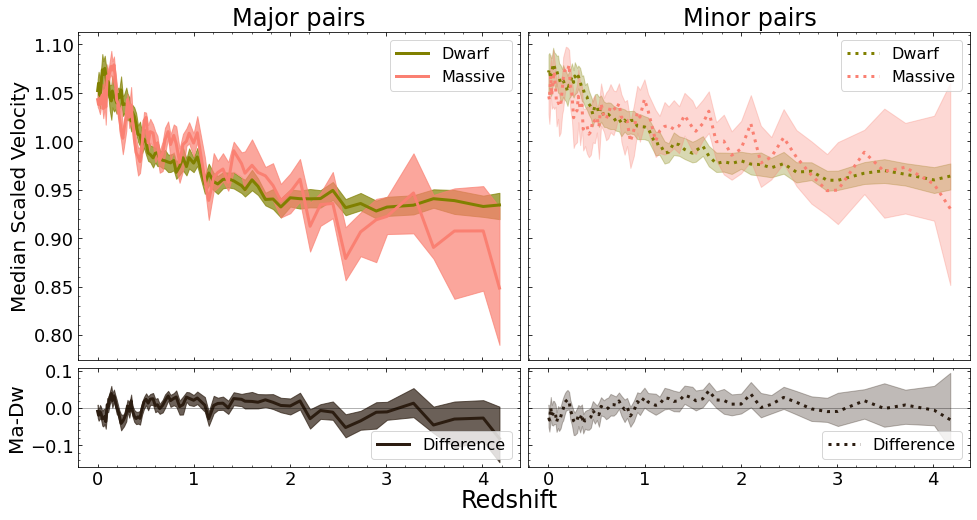

In [131]:
## plot of median counts and differences for illustris and tng
fig, ax = plt.subplots(2, 2, figsize=(16,8), sharey="row", sharex=True, gridspec_kw={'width_ratios': [1,1], 'height_ratios':[1,0.3],'wspace': 0.02,"hspace":0.04})

ax_d = ax[0][0]
ax_m = ax[0][1]
ax_ddiff = ax[1][0]
ax_mdiff = ax[1][1]

ax_d.set(title="Major pairs", ylabel="Median Scaled Velocity")
ax_m.set(title="Minor pairs")
ax_ddiff.set(ylabel=r"Ma-Dw")

#############
# dwarf #
#############
ax_d.plot(scaledvels['z'],scaledvels['Median Major Dwarf'], color=palette["dwarf"], lw=3, label="Dwarf")
ax_d.plot(scaledvels['z'],scaledvels['Median Major Massive'], color=palette["massive"], lw=3, label="Massive")

ax_d.fill_between(scaledvels['z'], np.array(scaledvels['Quartile Major Dwarf'])[:,0], np.array(scaledvels['Quartile Major Dwarf'])[:,1],color=palette["dwarf"],alpha=alphas["maj"])
ax_d.fill_between(scaledvels['z'], np.array(scaledvels['Quartile Major Massive'])[:,0], np.array(scaledvels['Quartile Major Massive'])[:,1],color=palette["massive"],alpha=alphas["maj"])

#############
# massive #
#############
ax_m.plot(scaledvels['z'],scaledvels['Median Minor Dwarf'], color=palette["dwarf"], lw=3, linestyle="dotted", label="Dwarf")
ax_m.plot(scaledvels['z'],scaledvels['Median Minor Massive'], color=palette["massive"], lw=3, linestyle="dotted", label="Massive")

ax_m.fill_between(scaledvels['z'], np.array(scaledvels['Quartile Minor Dwarf'])[:,0], np.array(scaledvels['Quartile Minor Dwarf'])[:,1],color=palette["dwarf"],alpha=alphas["min"])
ax_m.fill_between(scaledvels['z'], np.array(scaledvels['Quartile Minor Massive'])[:,0], np.array(scaledvels['Quartile Minor Massive'])[:,1],color=palette["massive"],alpha=alphas["min"])

##############
# major diff #
##############
ax_ddiff.plot(scaledvels['z'],scaledvels['Median Major Difference'], color=palette["difference"], lw=3, label="Difference")
ax_ddiff.fill_between(scaledvels['z'], np.array(scaledvels['Quartile Major Difference'])[:,0], np.array(scaledvels['Quartile Major Difference'])[:,1],color=palette["difference"],alpha=alphas["maj"])

##############
# minor diff #
##############
ax_mdiff.plot(scaledvels['z'],scaledvels['Median Minor Difference'], color=palette["difference"], lw=3, linestyle="dotted", label="Difference")
ax_mdiff.fill_between(scaledvels['z'], np.array(scaledvels['Quartile Minor Difference'])[:,0], np.array(scaledvels['Quartile Minor Difference'])[:,1],color=palette["difference"],alpha=alphas["min"])

ax_ddiff.axhline(0,color="black",lw=1,alpha=0.3)
ax_mdiff.axhline(0,color="black",lw=1,alpha=0.3)

#############
#############
for ax in [ax_d,ax_m]:
    leg = ax.legend(loc='upper right',fontsize=16)

for ax in [ax_ddiff,ax_mdiff]:
    leg = ax.legend(loc='lower right',fontsize=16)
              
fig.supxlabel("Redshift",y=0.045)
plt.savefig(f"../plots/paper1/scaledvel_1000.png",bbox_inches='tight',facecolor="white")
plt.show()


# Distributions

In [39]:
def get_sepvel(size, key, z, scaled=False):
    zloc = np.where( zs['z'] == z)[0]
    sim = "TNG"
    snapshot = zs['ztng'][zloc][0] 

    pair_path = f"{sim}_{snapshot}_1000.hdf5"
    pair_data = h5py.File(f"{paths.path_pairs}{pair_path}", "r")
    
    pairs = pair_data["pairs"]["hydro"]

    pri_stell = np.array(pairs["Sub1 Stellar Mass"])
    sec_stell = np.array(pairs["Sub2 Stellar Mass"])
    pairGroups = np.array(pairs["Group Mass"])
    pairGrRads = np.array(pairs["Group Radius"])
    seps = np.array(pairs["Separation"]) 
    vels = np.array(pairs["RelVel"]) 
    
    # masks            
    pair_pri = get_primmask(pri_stell, size)
    pair_group = get_groupmask(pairGroups, size)
    pair_sepcut = seps > 10
    
    pair_mask = pair_pri & pair_group & pair_sepcut
    
    majors = (sec_stell/pri_stell > 1/4)
    minors = (sec_stell/pri_stell > 1/10) & (sec_stell/pri_stell < 1/4)

    major_mask = pair_mask & majors
    minor_mask = pair_mask & minors
    
    if key == "Separation":
        scaleddat = seps / pairGrRads
    elif key == "RelVel":
        G = 4.3009173e4 # in km^2 kpc / (1e10M⊙ s^2)
        vvir = np.sqrt(G*pairGroups / pairGrRads)
        scaleddat = vels / (vvir)    
    
    if scaled: 
        dat = scaleddat
    elif key == "Separation":
        dat = seps
    elif key == "RelVel":
        dat = vels
    else:
        dat = np.array(pairs[key]) 

    majors = dat[major_mask]
    minors = dat[minor_mask]

    key_dict = {"major":majors, "minor":minors}
    

    return key_dict


## Separation

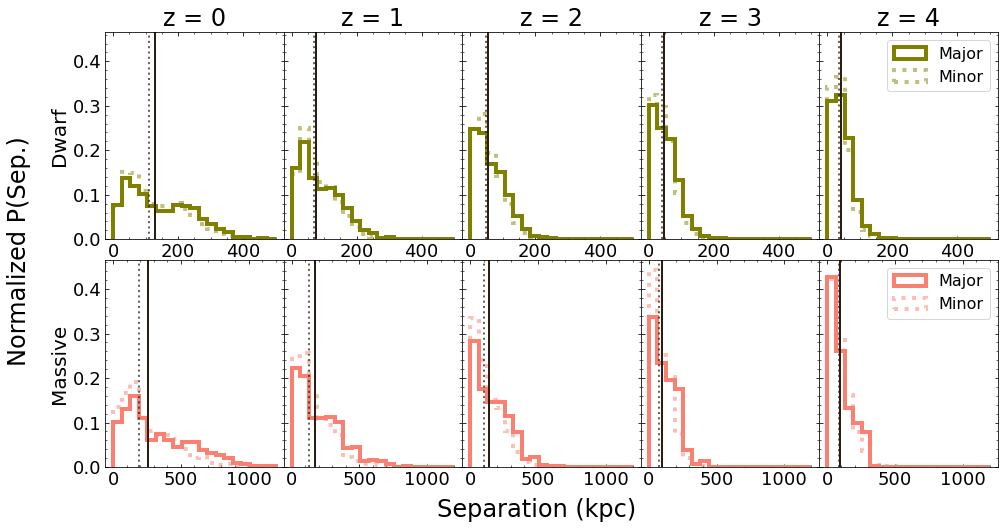

In [68]:
fig, ax = plt.subplots(2,5,figsize=(16,8),sharey=True,sharex=False)
plt.subplots_adjust(wspace=0,hspace=0.1)

for i in range(5):
    locc = np.where( np.min( np.abs(d_seps['z'] - i)  ) == np.abs(d_seps['z'] - i))
    
    tng_d = get_sepvel("dwarf", "Separation", i, scaled=False)
    tng_m = get_sepvel("massive", "Separation", i, scaled=False)
    
    bins_d = np.linspace(0,500,20)
    bins_h = np.linspace(0,1200,20)
    
    ax[0][i].set_title(f"z = {i}")

    # Illustris Major pairs
    col = palette["difference"]
    ala = 1

    ax[0][i].hist(tng_d['major'],bins=bins_d,weights=np.ones(len(tng_d['major']))/len(tng_d['major']),histtype="step", color=palette['dwarf'], lw=4, label='Major')
    ax[0][i].hist(tng_d['minor'],bins=bins_d,weights=np.ones(len(tng_d['minor']))/len(tng_d['minor']),histtype="step", color=palette['dwarf'], lw=4, alpha=0.5, linestyle="dotted", label="Minor") # to put minor behind
    
    ax[1][i].hist(tng_m['major'],bins=bins_h,weights=np.ones(len(tng_m['major']))/len(tng_m['major']),histtype="step", color=palette['massive'], lw=4, label='Major')
    ax[1][i].hist(tng_m['minor'],bins=bins_h,weights=np.ones(len(tng_m['minor']))/len(tng_m['minor']),histtype="step", color=palette['massive'], lw=4, alpha=0.5, linestyle="dotted", label="Minor") # to put minor behind

    ax[0][i].axvline( d_seps["Major Median"][locc] ,color=col, alpha=ala, lw=2)
    ax[0][i].axvline( d_seps["Minor Median"][locc] ,color=col, alpha=0.7, lw=2, linestyle="dotted")
    ax[1][i].axvline( m_seps["Major Median"][locc] ,color=col, alpha=ala, lw=2)
    ax[1][i].axvline( m_seps["Minor Median"][locc] ,color=col, alpha=0.7, lw=2, linestyle="dotted")

for xx in [ax[0][4],ax[1][4]]:
    leg = xx.legend(loc='upper right',fontsize=16)

fig.supxlabel(r"Separation (kpc)",y=0.03)
ax[0][0].set_ylabel("Dwarf")
ax[1][0].set_ylabel("Massive")
fig.supylabel("Normalized P(Sep.)",x=0.040)

plt.savefig(f"../plots/paper1/separation_distribution_1000.png",bbox_inches='tight',facecolor="white")
plt.show()

## Velocity

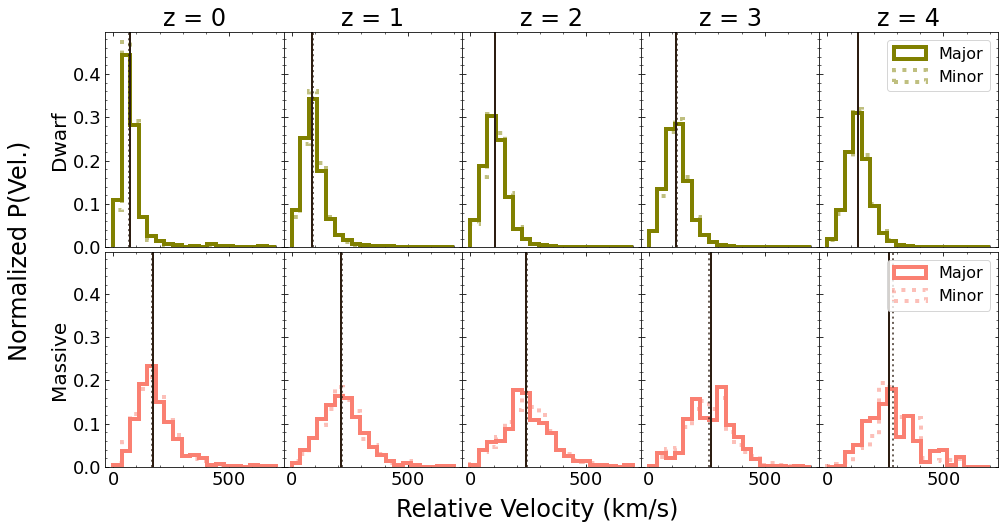

In [124]:
fig, ax = plt.subplots(2,5,figsize=(16,8),sharey=True,sharex=True)
plt.subplots_adjust(wspace=0,hspace=0.02)

for i in range(5):
    locc = np.where( np.min( np.abs(d_vels['z'] - i)  ) == np.abs(d_vels['z'] - i))
        
    tng_d = get_sepvel("dwarf", "RelVel", i, scaled=False)
    tng_m = get_sepvel("massive", "RelVel", i, scaled=False)
    
    bins_d = np.linspace(0,700,20)
    bins_h = np.linspace(0,700,20)
    
    ax[0][i].set_title(f"z = {i}")

    # Illustris Major pairs
    col = palette["difference"]
    ala = 1
    ax[0][i].hist(tng_d['major'],bins=bins_d,weights=np.ones(len(tng_d['major']))/len(tng_d['major']),histtype="step", color=palette['dwarf'], lw=4, label='Major')
    ax[0][i].hist(tng_d['minor'],bins=bins_d,weights=np.ones(len(tng_d['minor']))/len(tng_d['minor']),histtype="step", color=palette['dwarf'], lw=4, alpha=0.5, linestyle="dotted", label="Minor") # to put minor behind

    ax[1][i].hist(tng_m['major'],bins=bins_h,weights=np.ones(len(tng_m['major']))/len(tng_m['major']),histtype="step", color=palette['massive'], lw=4, label='Major')
    ax[1][i].hist(tng_m['minor'],bins=bins_h,weights=np.ones(len(tng_m['minor']))/len(tng_m['minor']),histtype="step", color=palette['massive'], lw=4, alpha=0.5, linestyle="dotted", label="Minor") # to put minor behind
    
    ax[0][i].axvline( d_vels["Major Median"][locc] ,color=col, alpha=ala, lw=2)
    ax[0][i].axvline( d_vels["Minor Median"][locc] ,color=col, alpha=0.7, linestyle="dotted", lw=2)
    ax[1][i].axvline( m_vels["Major Median"][locc] ,color=col, alpha=ala, lw=2)
    ax[1][i].axvline( m_vels["Minor Median"][locc] ,color=col, alpha=0.7, linestyle="dotted", lw=2)
    
for xx in [ax[0][4],ax[1][4]]:
    leg = xx.legend(loc='upper right',fontsize=16)

fig.supxlabel(r"Relative Velocity (km/s)",y=0.03)
ax[0][0].set_ylabel("Dwarf")
ax[1][0].set_ylabel("Massive")
fig.supylabel("Normalized P(Vel.)",x=0.040)

plt.savefig(f"../plots/paper1/velocity_distribution_1000.png",bbox_inches='tight',facecolor="white")
plt.show()

## Scaled separation

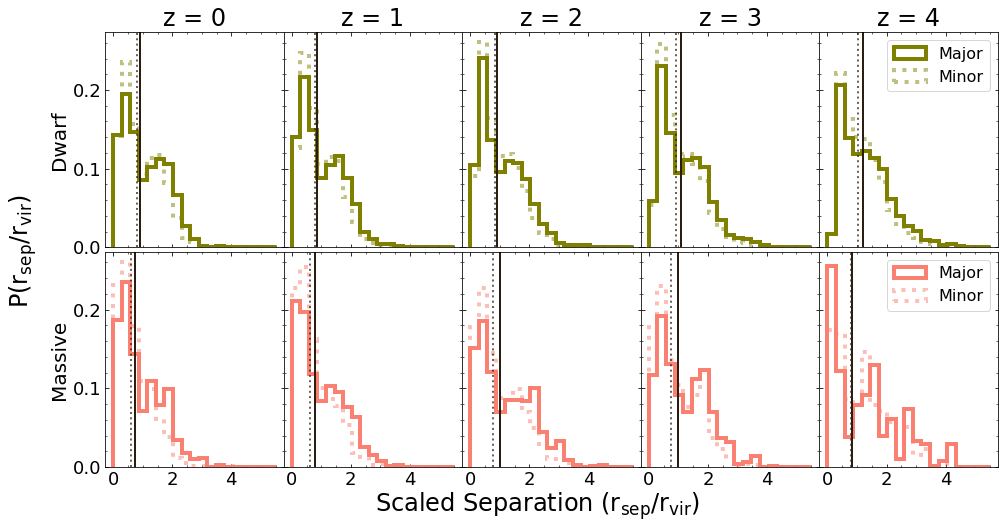

In [123]:
fig, ax = plt.subplots(2,5,figsize=(16,8),sharey=True,sharex=True)
plt.subplots_adjust(wspace=0,hspace=0.02)

for i in range(5):
    locc = np.where( np.min( np.abs(scaledseps['z'] - i)  ) == np.abs(scaledseps['z'] - i))
    
    tng_d = get_sepvel("dwarf", "Separation", i, scaled=True)
    tng_m = get_sepvel("massive", "Separation", i, scaled=True)
    
    bins_d = np.linspace(0,5.5,20)
    bins_h = np.linspace(0,5.5,20)
    
    ax[0][i].set_title(f"z = {i}")

    # Illustris Major pairs
    ax[0][i].hist(tng_d['major'],bins=bins_d,weights=np.ones(len(tng_d['major']))/len(tng_d['major']),histtype="step", color=palette['dwarf'], lw=4, label='Major')
    ax[0][i].hist(tng_d['minor'],bins=bins_d,weights=np.ones(len(tng_d['minor']))/len(tng_d['minor']),histtype="step", color=palette['dwarf'], lw=4, alpha=0.5, linestyle="dotted", label="Minor") # to put minor behind

    ax[1][i].hist(tng_m['major'],bins=bins_h,weights=np.ones(len(tng_m['major']))/len(tng_m['major']),histtype="step", color=palette['massive'], lw=4, label='Major')
    ax[1][i].hist(tng_m['minor'],bins=bins_h,weights=np.ones(len(tng_m['minor']))/len(tng_m['minor']),histtype="step", color=palette['massive'], lw=4, alpha=0.5, linestyle="dotted", label="Minor") # to put minor behind
   
    ax[0][i].axvline( scaledseps["Median Major Dwarf"][locc] ,color=palette["difference"], lw=2)
    ax[0][i].axvline( scaledseps["Median Minor Dwarf"][locc] ,color=palette["difference"], linestyle="dotted", alpha=0.7, lw=2)
    ax[1][i].axvline( scaledseps["Median Major Massive"][locc] ,color=palette["difference"], lw=2)
    ax[1][i].axvline( scaledseps["Median Minor Massive"][locc] ,color=palette["difference"], linestyle="dotted", alpha=0.7, lw=2)

    
for i in ax:
    for j in i:
        j.set_xticks((0,2,4), labels=("0","2","4"))
    
    
for xx in [ax[0][4],ax[1][4]]:
    leg = xx.legend(loc='upper right',fontsize=16)

fig.supxlabel(r"Scaled Separation ($\rm r_{sep}/r_{vir}$)",y=0.03)
ax[0][0].set_ylabel("Dwarf")
ax[1][0].set_ylabel("Massive")
fig.supylabel(r"P($\rm r_{sep}/r_{vir}$)",x=0.040)

plt.savefig(f"../plots/paper1/scaledsep_distribution_1000.png",bbox_inches='tight',facecolor="white")
plt.show()

## Scaled velocity

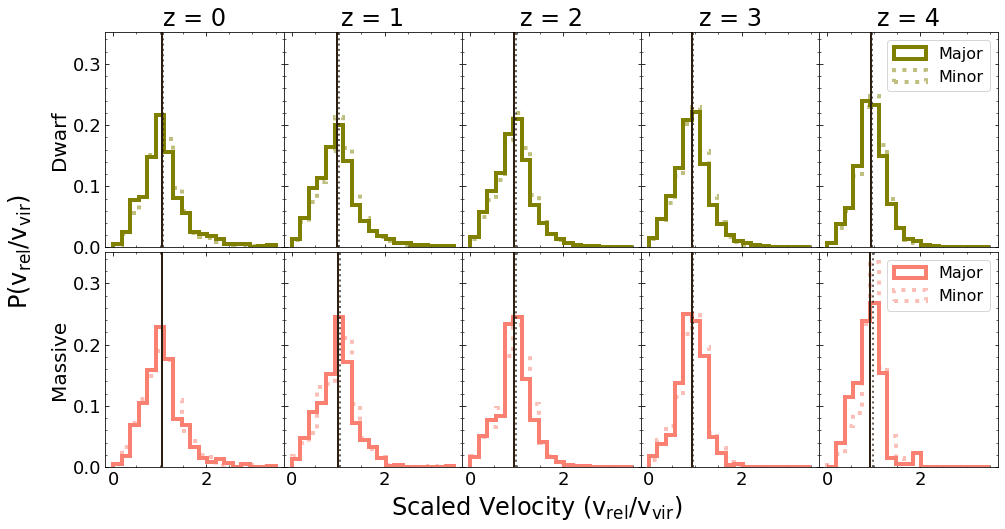

In [125]:
fig, ax = plt.subplots(2,5,figsize=(16,8),sharey=True,sharex=False)
plt.subplots_adjust(wspace=0,hspace=0.02)

for i in range(5):
    locc = np.where( np.min( np.abs(scaledvels['z'] - i)  ) == np.abs(scaledvels['z'] - i))
        
    tng_d = get_sepvel("dwarf", "RelVel", i, scaled=True)
    tng_m = get_sepvel("massive", "RelVel", i, scaled=True)
    
    bins_d = np.linspace(0,3.5,20)
    bins_h = np.linspace(0,3.5,20)
    
    ax[0][i].set_title(f"z = {i}")

    # Illustris Major pairs
    ax[0][i].hist(tng_d['major'],bins=bins_d,weights=np.ones(len(tng_d['major']))/len(tng_d['major']),histtype="step", color=palette['dwarf'], lw=4, label='Major')
    ax[0][i].hist(tng_d['minor'],bins=bins_d,weights=np.ones(len(tng_d['minor']))/len(tng_d['minor']),histtype="step", color=palette['dwarf'], lw=4, alpha=0.5, linestyle="dotted", label="Minor") # to put minor behind

    ax[1][i].hist(tng_m['major'],bins=bins_h,weights=np.ones(len(tng_m['major']))/len(tng_m['major']),histtype="step", color=palette['massive'], lw=4, label='Major')
    ax[1][i].hist(tng_m['minor'],bins=bins_h,weights=np.ones(len(tng_m['minor']))/len(tng_m['minor']),histtype="step", color=palette['massive'], lw=4, alpha=0.5, linestyle="dotted", label="Minor") # to put minor behind
    
    ax[0][i].axvline( scaledvels["Median Major Dwarf"][locc] ,color=palette['difference'], lw=2)
    ax[0][i].axvline( scaledvels["Median Minor Dwarf"][locc] ,color=palette['difference'], linestyle="dotted", alpha=0.7, lw=2)
    ax[1][i].axvline( scaledvels["Median Major Massive"][locc] ,color=palette['difference'], lw=2)
    ax[1][i].axvline( scaledvels["Median Minor Massive"][locc] ,color=palette['difference'], linestyle="dotted", alpha=0.7, lw=2)
     

for xx in [ax[0][4],ax[1][4]]:
    leg = xx.legend(loc='upper right',fontsize=16)


fig.supxlabel(r"Scaled Velocity ($\rm v_{rel}/v_{vir}$)",y=0.03)
ax[0][0].set_ylabel("Dwarf")
ax[1][0].set_ylabel("Massive")
fig.supylabel(r"P($\rm v_{rel}/v_{vir}$)",x=0.040)

plt.savefig(f"../plots/paper1/scaledvel_distribution_1000.png",bbox_inches='tight',facecolor="white")
plt.show()

# Graveyard

In [23]:
# ## plot of median counts and differences for illustris and tng
# fig, ax = plt.subplots(2, 2, figsize=(16,16), sharey="row", sharex=True, gridspec_kw={'width_ratios': [1,1], 'height_ratios':[1,1],'wspace': 0.05,"hspace":0.02})

# axmaj_d = ax[0][0]
# axmin_d = ax[0][1]
# axmaj_m = ax[1][0]
# axmin_m = ax[1][1]


# axmaj_d.set(title="Major pairs", ylabel="Median Separation [kpc]")
# axmin_d.set(title="Minor pairs")
# axmaj_m.set(ylabel="Median Separation [kpc]")

# al = 0.5

# #############
# # dwarf major #
# #############
# axmaj_d.plot(tngd_d['z'],tngd_d['Major Median'], color=palette["Illustris dark"], lw=3)
# axmaj_d.plot(tngh_d['z'],tngh_d['Major Median'], color=palette["Illustris hydro"], lw=3)

# axmaj_d.fill_between(tngd_d['z'], np.array(tngd_d['Major Quarts'])[:,0], np.array(tngd_d['Major Quarts'])[:,1],color=palette["Illustris dark"],alpha=al, label="Dark")
# axmaj_d.fill_between(tngh_d['z'], np.array(tngh_d['Major Quarts'])[:,0], np.array(tngh_d['Major Quarts'])[:,1],color=palette["Illustris hydro"],alpha=al, label="Hydro")


# #############
# # dwarf minor #
# #############
# axmin_d.plot(tngd_d['z'],tngd_d['Minor Median'], color=palette["Illustris dark"], lw=3)
# axmin_d.plot(tngh_d['z'],tngh_d['Minor Median'], color=palette["Illustris hydro"], lw=3)

# axmin_d.fill_between(tngd_d['z'], np.array(tngd_d['Minor Quarts'])[:,0], np.array(tngd_d['Minor Quarts'])[:,1],color=palette["Illustris dark"],alpha=al, label="Dark")
# axmin_d.fill_between(tngh_d['z'], np.array(tngh_d['Minor Quarts'])[:,0], np.array(tngh_d['Minor Quarts'])[:,1],color=palette["Illustris hydro"],alpha=al, label="Hydro")

# #############
# # massive major #
# #############
# axmaj_m.plot(tngd_d['z'],tngd_m['Major Median'], color=palette["TNG dark"], lw=3)
# axmaj_m.plot(tngh_d['z'],tngh_m['Major Median'], color=palette["TNG hydro"], lw=3)

# axmaj_m.fill_between(tngd_m['z'], np.array(tngd_m['Major Quarts'])[:,0], np.array(tngd_m['Major Quarts'])[:,1],color=palette["TNG dark"],alpha=al, label="Dark")
# axmaj_m.fill_between(tngh_m['z'], np.array(tngh_m['Major Quarts'])[:,0], np.array(tngh_m['Major Quarts'])[:,1],color=palette["TNG hydro"],alpha=al, label="Hydro")


# #############
# # massive minor #
# #############
# axmin_m.plot(tngd_m['z'],tngd_m['Minor Median'], color=palette["TNG dark"], lw=3)
# axmin_m.plot(tngh_m['z'],tngh_m['Minor Median'], color=palette["TNG hydro"], lw=3)
# # axmin_m.plot(tngsim_m['z'],tngsim_m['Minor Median'], color='black', lw=3)

# axmin_m.fill_between(tngd_m['z'], np.array(tngd_m['Minor Quarts'])[:,0], np.array(tngd_m['Minor Quarts'])[:,1],color=palette["TNG dark"],alpha=al, label="Dark")
# axmin_m.fill_between(tngh_m['z'], np.array(tngh_m['Minor Quarts'])[:,0], np.array(tngh_m['Minor Quarts'])[:,1],color=palette["TNG hydro"],alpha=al, label="Hydro")


# ############
# ############
# for ax, tit in zip([axmin_d,axmin_m],["Dwarf","Massive"]):
#     leg = ax.legend(loc='upper right',title=tit,fontsize=16)

#     for lh in leg.legendHandles: 
#         lh.set_alpha(1)
              
# fig.supxlabel("Redshift",y=0.08)
# plt.savefig(f"../plots/paper1/separations.png",bbox_inches='tight',facecolor="white")
# plt.show()


In [24]:
# ## plot of median counts and differences for illustris and tng
# fig, ax = plt.subplots(2, 2, figsize=(16,16), sharey="row", sharex=True, gridspec_kw={'width_ratios': [1,1], 'height_ratios':[1,1],'wspace': 0.05,"hspace":0.02})

# # axmaj_d = ax[0][0]
# # axmin_d = ax[0][1]
# # axmaj_m = ax[1][0]
# # axmin_m = ax[1][1]

# axmaj_d = ax[0][0]
# axmin_d = ax[1][0]
# axmaj_m = ax[0][1]
# axmin_m = ax[1][1]


# axmaj_d.set(title="Dwarf pairs", ylabel="Major pair separation")
# axmaj_m.set(title="Massive pairs")
# axmin_d.set(ylabel="Minor pair separation")

# al = 0.5

# #############
# # dwarf major #
# #############
# axmaj_d.plot(tngd_d['z'],tngd_d['Major Median'], color=palette["Illustris dark"], lw=3)
# axmaj_d.plot(tngh_d['z'],tngh_d['Major Median'], color=palette["Illustris hydro"], lw=3)

# axmaj_d.fill_between(tngd_d['z'], np.array(tngd_d['Major Quarts'])[:,0], np.array(tngd_d['Major Quarts'])[:,1],color=palette["Illustris dark"],alpha=al, label="Dark")
# axmaj_d.fill_between(tngh_d['z'], np.array(tngh_d['Major Quarts'])[:,0], np.array(tngh_d['Major Quarts'])[:,1],color=palette["Illustris hydro"],alpha=al, label="Hydro")


# #############
# # dwarf minor #
# #############
# axmin_d.plot(tngd_d['z'],tngd_d['Minor Median'], color=palette["Illustris dark"], lw=3)
# axmin_d.plot(tngh_d['z'],tngh_d['Minor Median'], color=palette["Illustris hydro"], lw=3)

# axmin_d.fill_between(tngd_d['z'], np.array(tngd_d['Minor Quarts'])[:,0], np.array(tngd_d['Minor Quarts'])[:,1],color=palette["Illustris dark"],alpha=al, label="Dark")
# axmin_d.fill_between(tngh_d['z'], np.array(tngh_d['Minor Quarts'])[:,0], np.array(tngh_d['Minor Quarts'])[:,1],color=palette["Illustris hydro"],alpha=al, label="Hydro")

# #############
# # massive major #
# #############
# axmaj_m.plot(tngd_d['z'],tngd_m['Major Median'], color=palette["TNG dark"], lw=3)
# axmaj_m.plot(tngh_d['z'],tngh_m['Major Median'], color=palette["TNG hydro"], lw=3)

# axmaj_m.fill_between(tngd_m['z'], np.array(tngd_m['Major Quarts'])[:,0], np.array(tngd_m['Major Quarts'])[:,1],color=palette["TNG dark"],alpha=al, label="Dark")
# axmaj_m.fill_between(tngh_m['z'], np.array(tngh_m['Major Quarts'])[:,0], np.array(tngh_m['Major Quarts'])[:,1],color=palette["TNG hydro"],alpha=al, label="Hydro")


# #############
# # massive minor #
# #############
# axmin_m.plot(tngd_m['z'],tngd_m['Minor Median'], color=palette["TNG dark"], lw=3)
# axmin_m.plot(tngh_m['z'],tngh_m['Minor Median'], color=palette["TNG hydro"], lw=3)

# axmin_m.fill_between(tngd_m['z'], np.array(tngd_m['Minor Quarts'])[:,0], np.array(tngd_m['Minor Quarts'])[:,1],color=palette["TNG dark"],alpha=al, label="Dark")
# axmin_m.fill_between(tngh_m['z'], np.array(tngh_m['Minor Quarts'])[:,0], np.array(tngh_m['Minor Quarts'])[:,1],color=palette["TNG hydro"],alpha=al, label="Hydro")



# #############
# #############
# for ax, tit in zip([axmaj_m,axmin_m],["Major","Minor"]):
#     leg = ax.legend(loc='upper right',title=tit,fontsize=16)

#     for lh in leg.legendHandles: 
#         lh.set_alpha(1)
        
# for ax, tit in zip([axmaj_d,axmin_d],["Major","Minor"]):
#     leg = ax.legend(loc='upper right',title=tit,fontsize=16)

#     for lh in leg.legendHandles: 
#         lh.set_alpha(1)
              
# fig.supxlabel("Redshift",y=0.08)
# plt.savefig(f"../plots/paper1/separations_T.png",bbox_inches='tight',facecolor="white")
# plt.show()


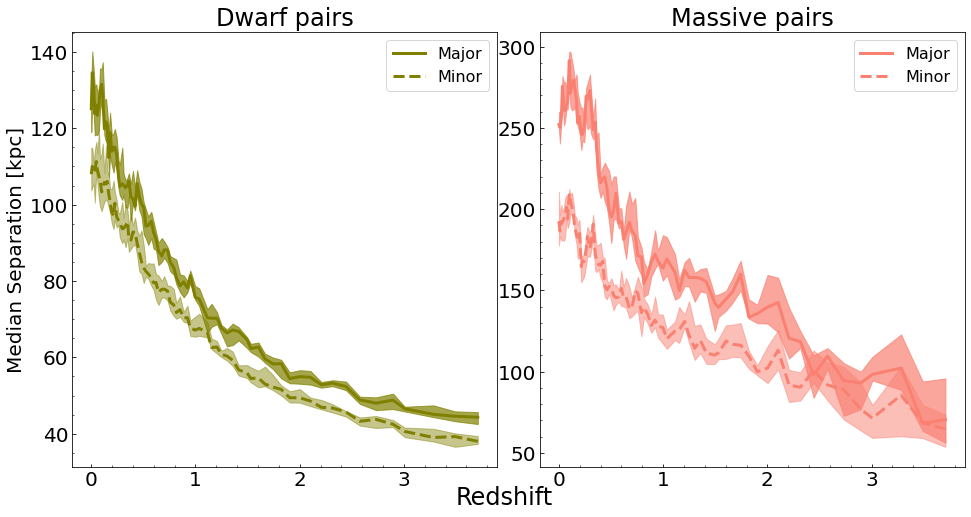

In [14]:
## plot of median counts and differences for illustris and tng
fig, ax = plt.subplots(1, 2, figsize=(16,8), sharey=False, sharex=True, gridspec_kw={'width_ratios': [1,1], 'height_ratios':[1],'wspace': 0.1})

ax_d = ax[0]
ax_m = ax[1]


ax_d.set(title="Dwarf pairs", ylabel="Median Separation [kpc]")
ax_m.set(title="Massive pairs")

al = 0.7

#############
# dwarf #
#############
ax_d.plot(d_seps['z'],d_seps['Major Median'], color=palette["dwarf"], lw=3, label="Major")
ax_d.plot(d_seps['z'],d_seps['Minor Median'], color=palette["dwarf"], lw=3, linestyle="dotted", label="Minor")

ax_d.fill_between(d_seps['z'], np.array(d_seps['Major Quarts'])[:,0], np.array(d_seps['Major Quarts'])[:,1],color=palette["dwarf"], alpha=alphas["maj"])
ax_d.fill_between(d_seps['z'], np.array(d_seps['Minor Quarts'])[:,0], np.array(d_seps['Minor Quarts'])[:,1],color=palette["dwarf"], alpha=alphas["min"])


#############
# massive #
#############
ax_m.plot(m_seps['z'],m_seps['Major Median'], color=palette["massive"], lw=3, label="Major")
ax_m.plot(m_seps['z'],m_seps['Minor Median'], color=palette["massive"], lw=3, linestyle="dotted", label="Minor")

ax_m.fill_between(m_seps['z'], np.array(m_seps['Major Quarts'])[:,0], np.array(m_seps['Major Quarts'])[:,1],color=palette["massive"],alpha=alphas["maj"])
ax_m.fill_between(m_seps['z'], np.array(m_seps['Minor Quarts'])[:,0], np.array(m_seps['Minor Quarts'])[:,1],color=palette["massive"],alpha=alphas["min"])


#############
#############
for ax in [ax_d,ax_m]:
    leg = ax.legend(loc='upper right',fontsize=16)

#     for lh in leg.legendHandles: 
#         lh.set_alpha(1)
              
fig.supxlabel("Redshift",y=0.05)
plt.savefig(f"../plots/paper1/separations.png",bbox_inches='tight',facecolor="white")
plt.show()


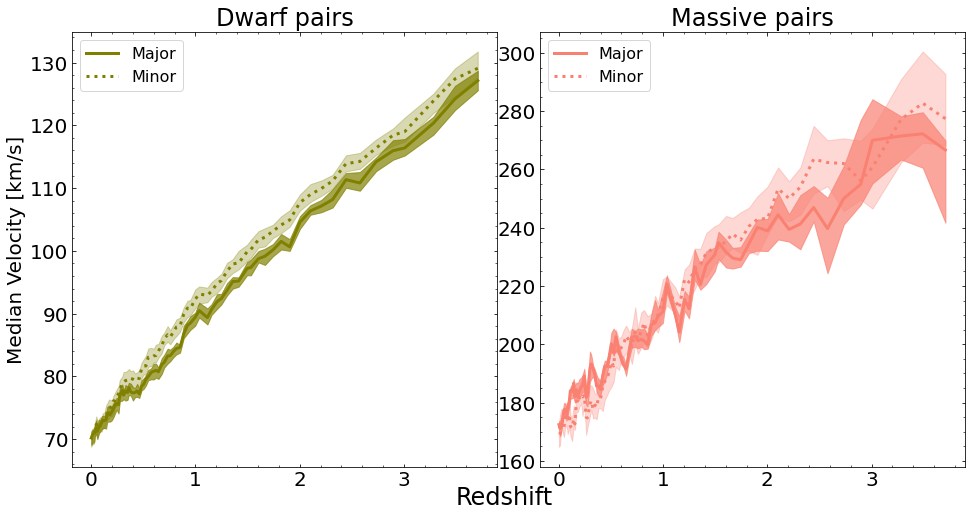

In [82]:
## plot of median counts and differences for illustris and tng
fig, ax = plt.subplots(1, 2, figsize=(16,8), sharey=False, sharex=True, gridspec_kw={'width_ratios': [1,1], 'height_ratios':[1],'wspace': 0.1})

ax_d = ax[0]
ax_m = ax[1]


ax_d.set(title="Dwarf pairs", ylabel="Median Velocity [km/s]")
ax_m.set(title="Massive pairs")

al = 0.7

#############
# dwarf #
#############
ax_d.plot(d_vels['z'],d_vels['Major Median'], color=palette["dwarf"], lw=3, label="Major")
ax_d.plot(d_vels['z'],d_vels['Minor Median'], color=palette["dwarf"], lw=3,linestyle="dotted", label="Minor")

ax_d.fill_between(d_vels['z'], np.array(d_vels['Major Quarts'])[:,0], np.array(d_vels['Major Quarts'])[:,1], color=palette["dwarf"], alpha=alphas["maj"])
ax_d.fill_between(d_vels['z'], np.array(d_vels['Minor Quarts'])[:,0], np.array(d_vels['Minor Quarts'])[:,1], color=palette["dwarf"], alpha=alphas["min"])

#############
# massive #
#############
ax_m.plot(m_vels['z'],m_vels['Major Median'], color=palette["massive"], lw=3, label="Major")
ax_m.plot(m_vels['z'],m_vels['Minor Median'], color=palette["massive"], lw=3, linestyle="dotted", label="Minor")

ax_m.fill_between(m_vels['z'], np.array(m_vels['Major Quarts'])[:,0], np.array(m_vels['Major Quarts'])[:,1], color=palette["massive"], alpha=alphas["maj"])
ax_m.fill_between(m_vels['z'], np.array(m_vels['Minor Quarts'])[:,0], np.array(m_vels['Minor Quarts'])[:,1], color=palette["massive"], alpha=alphas["min"])


#############
#############
for ax in [ax_d,ax_m]:
    leg = ax.legend(loc='upper left',fontsize=16)

#     for lh in leg.legendHandles: 
#         lh.set_alpha(1)
              
fig.supxlabel("Redshift",y=0.05)
# plt.savefig(f"../plots/paper1/velocities.png",bbox_inches='tight',facecolor="white")
plt.show()


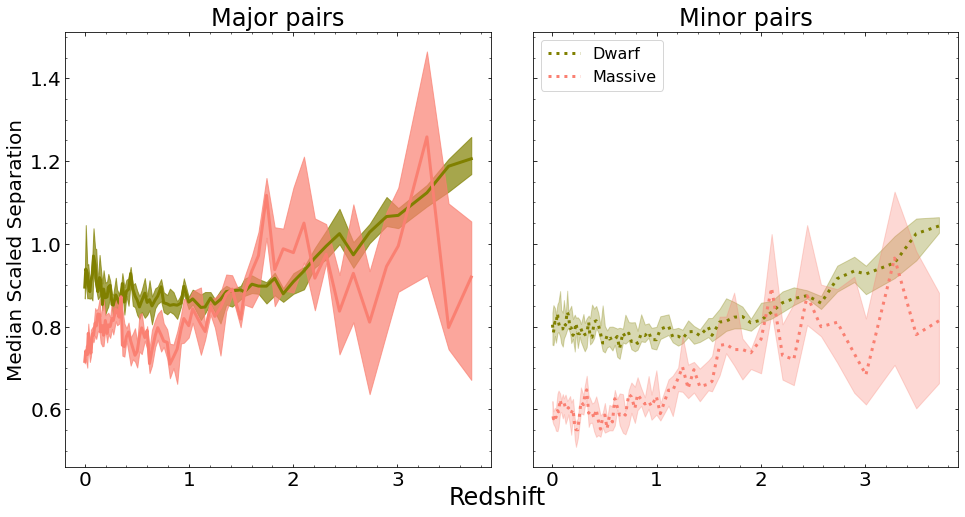

In [186]:
## plot of median counts and differences for illustris and tng
fig, ax = plt.subplots(1, 2, figsize=(16,8), sharey=True, sharex=True, gridspec_kw={'width_ratios': [1,1], 'height_ratios':[1],'wspace': 0.1})

ax_d = ax[0]
ax_m = ax[1]


ax_d.set(title="Major pairs", ylabel="Median Scaled Separation")
ax_m.set(title="Minor pairs")

al = 0.7

#############
# dwarf #
#############
ax_d.plot(scaledseps['z'],scaledseps['Median Major Dwarf'], color=palette["dwarf"], lw=3, label="Dwarf")
ax_d.plot(scaledseps['z'],scaledseps['Median Major Massive'], color=palette["massive"], lw=3, label="Massive")

ax_d.fill_between(scaledseps['z'], np.array(scaledseps['Quartile Major Dwarf'])[:,0], np.array(scaledseps['Quartile Major Dwarf'])[:,1],color=palette["dwarf"],alpha=alphas["maj"])
ax_d.fill_between(scaledseps['z'], np.array(scaledseps['Quartile Major Massive'])[:,0], np.array(scaledseps['Quartile Major Massive'])[:,1],color=palette["massive"],alpha=alphas["maj"])

#############
# massive #
#############
ax_m.plot(scaledseps['z'],scaledseps['Median Minor Dwarf'], color=palette["dwarf"], lw=3, linestyle="dotted", label="Dwarf")
ax_m.plot(scaledseps['z'],scaledseps['Median Minor Massive'], color=palette["massive"], lw=3, linestyle="dotted", label="Massive")

ax_m.fill_between(scaledseps['z'], np.array(scaledseps['Quartile Minor Dwarf'])[:,0], np.array(scaledseps['Quartile Minor Dwarf'])[:,1],color=palette["dwarf"],alpha=alphas["min"])
ax_m.fill_between(scaledseps['z'], np.array(scaledseps['Quartile Minor Massive'])[:,0], np.array(scaledseps['Quartile Minor Massive'])[:,1],color=palette["massive"],alpha=alphas["min"])

#############
#############
for ax in [ax_m]:
    leg = ax.legend(loc='upper left',fontsize=16)

    for lh in leg.legendHandles: 
        lh.set_alpha(1)
              
fig.supxlabel("Redshift",y=0.05)
# plt.savefig(f"../plots/paper1/separations_scaled.png",bbox_inches='tight',facecolor="white")
plt.show()


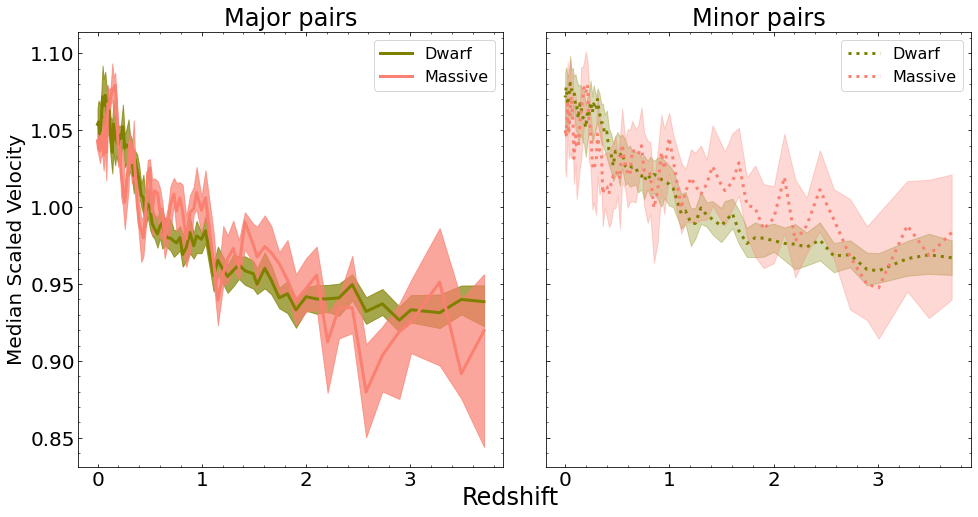

In [208]:
## plot of median counts and differences for illustris and tng
fig, ax = plt.subplots(1, 2, figsize=(16,8), sharey=True, sharex=True, gridspec_kw={'width_ratios': [1,1], 'height_ratios':[1],'wspace': 0.1})

ax_d = ax[0]
ax_m = ax[1]

ax_d.set(title="Major pairs", ylabel="Median Scaled Velocity")
ax_m.set(title="Minor pairs")

al = 0.7

#############
# dwarf #
#############
ax_d.plot(scaledvels['z'],scaledvels['Median Major Dwarf'], color=palette["dwarf"], lw=3, label="Dwarf")
ax_d.plot(scaledvels['z'],scaledvels['Median Major Massive'], color=palette["massive"], lw=3, label="Massive")

ax_d.fill_between(scaledvels['z'], np.array(scaledvels['Quartile Major Dwarf'])[:,0], np.array(scaledvels['Quartile Major Dwarf'])[:,1],color=palette["dwarf"],alpha=alphas["maj"])
ax_d.fill_between(scaledvels['z'], np.array(scaledvels['Quartile Major Massive'])[:,0], np.array(scaledvels['Quartile Major Massive'])[:,1],color=palette["massive"],alpha=alphas["maj"])


#############
# massive #
#############
ax_m.plot(scaledvels['z'],scaledvels['Median Minor Dwarf'], color=palette["dwarf"], lw=3, linestyle="dotted", label="Dwarf")
ax_m.plot(scaledvels['z'],scaledvels['Median Minor Massive'], color=palette["massive"], lw=3, linestyle="dotted", label="Massive")

ax_m.fill_between(scaledvels['z'], np.array(scaledvels['Quartile Minor Dwarf'])[:,0], np.array(scaledvels['Quartile Minor Dwarf'])[:,1],color=palette["dwarf"],alpha=alphas["min"])
ax_m.fill_between(scaledvels['z'], np.array(scaledvels['Quartile Minor Massive'])[:,0], np.array(scaledvels['Quartile Minor Massive'])[:,1],color=palette["massive"],alpha=alphas["min"])

#############
#############
for ax in [ax_d,ax_m]:
    leg = ax.legend(loc='upper right',fontsize=16)

    for lh in leg.legendHandles: 
        lh.set_alpha(1)
              
fig.supxlabel("Redshift",y=0.05)
# plt.savefig(f"../plots/paper1/velocities_scaled.png",bbox_inches='tight',facecolor="white")
plt.show()
